In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
loans = pd.read_csv('prosperLoanData.csv')

In [5]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [10]:
clean_loans = loans.copy()

In [14]:
clean_loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [29]:
clean_loans= clean_loans[['LoanStatus','LoanOriginalAmount', 'Term', 'BorrowerRate','BorrowerAPR',
             'CreditScoreRangeLower','CreditScoreRangeUpper','TotalTrades','IncomeRange',]]

In [32]:
clean_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
LoanStatus               113937 non-null object
LoanOriginalAmount       113937 non-null int64
Term                     113937 non-null int64
BorrowerRate             113937 non-null float64
BorrowerAPR              113912 non-null float64
CreditScoreRangeLower    113346 non-null float64
CreditScoreRangeUpper    113346 non-null float64
TotalTrades              106393 non-null float64
IncomeRange              113937 non-null object
dtypes: float64(5), int64(2), object(2)
memory usage: 7.8+ MB


In [45]:
clean_loans = clean_loans.dropna()
clean_loans.head()

,LoanStatus,LoanOriginalAmount,Term,BorrowerRate,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper,TotalTrades,IncomeRange
0,Completed,9425,36,0.1580,0.16516,640.0,659.0,11.0,"$25,000-49,999"
1,Current,10000,36,0.0920,0.12016,680.0,699.0,29.0,"$50,000-74,999"
3,Current,10000,36,0.0974,0.12528,800.0,819.0,26.0,"$25,000-49,999"
4,Current,15000,36,0.2085,0.24614,680.0,699.0,39.0,"$100,000+"
5,Current,15000,60,0.1314,0.15425,740.0,759.0,47.0,"$100,000+"


In [35]:
clean_loans.LoanStatus.value_counts()

Current                   56576
Completed                 33600
Chargedoff                10650
Defaulted                  3294
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

In [44]:
defaults = clean_loans.query("LoanStatus == 'Defaulted' ")
defaults= defaults.drop(columns={'LoanStatus'})
defaults

,LoanOriginalAmount,Term,BorrowerRate,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper,TotalTrades,IncomeRange
15,4000,36,0.3177,0.35797,700.0,719.0,17.0,"$50,000-74,999"
23,2000,36,0.2419,0.28032,680.0,699.0,22.0,"$25,000-49,999"
107,4000,36,0.3177,0.35797,720.0,739.0,45.0,"$25,000-49,999"
138,3000,36,0.2999,0.33973,620.0,639.0,27.0,"$25,000-49,999"
179,5500,36,0.3073,0.34731,660.0,679.0,32.0,"$50,000-74,999"
...,...,...,...,...,...,...,...,...
113814,2000,36,0.2600,0.27535,540.0,559.0,1.0,"$1-24,999"
113823,4000,36,0.1550,0.16941,680.0,699.0,23.0,"$1-24,999"
113840,1400,36,0.2000,0.22674,660.0,679.0,12.0,"$1-24,999"
113847,8000,36,0.2000,0.20735,740.0,759.0,25.0,"$100,000+"


In [53]:
defaults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294 entries, 15 to 113918
Data columns (total 8 columns):
LoanOriginalAmount       3294 non-null int64
Term                     3294 non-null int64
BorrowerRate             3294 non-null float64
BorrowerAPR              3294 non-null float64
CreditScoreRangeLower    3294 non-null float64
CreditScoreRangeUpper    3294 non-null float64
TotalTrades              3294 non-null float64
IncomeRange              3294 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 231.6+ KB


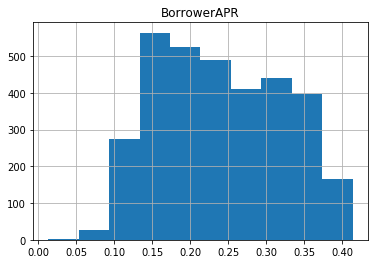

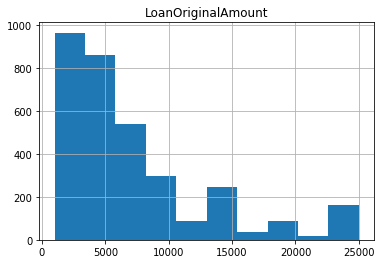

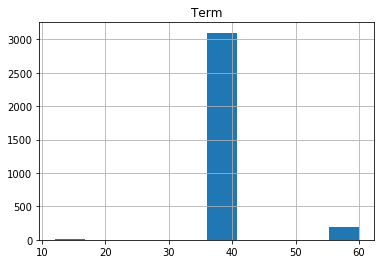

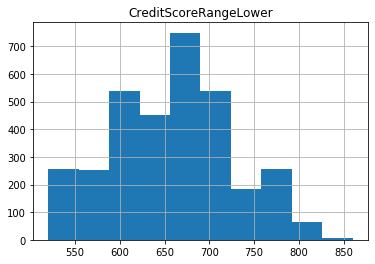

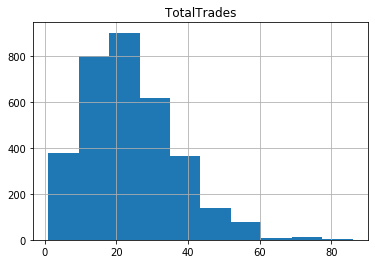

In [70]:
defaults.hist('BorrowerAPR')
defaults.hist('LoanOriginalAmount');
defaults.hist('Term');
defaults.hist('CreditScoreRangeLower');
defaults.hist('TotalTrades');

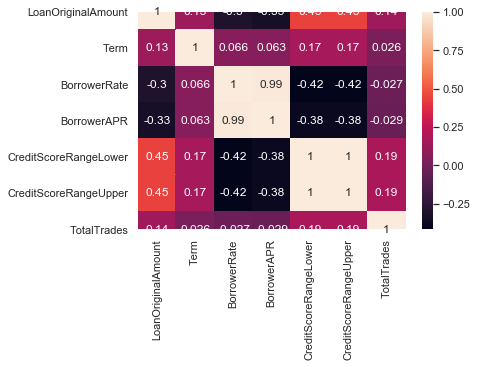

In [83]:

sns.heatmap(defaults.corr(),annot=True)

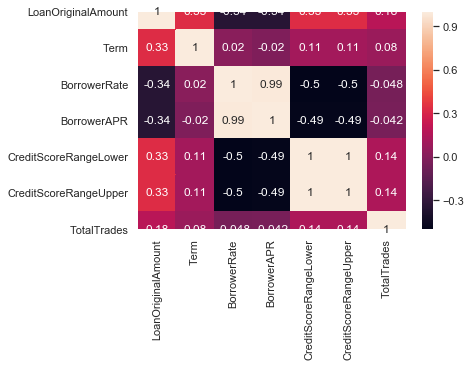

In [93]:
sns.heatmap(clean_loans.corr(),annot=True)

In [92]:
#Create a heat map by apr that shows LoanStatus
#or
#Create a heat map by IncomeStatus that shows LoanStatus

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''